<a href="https://colab.research.google.com/github/TomohiroKobayashi/DCGAN-tensorflow/blob/master/aiacademy_dog_cat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [0]:
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 63
model name	: Intel(R) Xeon(R) CPU @ 2.30GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2300.000
cache size	: 46080 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm invpcid_single pti ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 avx2 smep bmi2 erms invpcid xsaveopt arat arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf
bogomips	: 4600.00
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 bits virtual
power management:

processor	: 1
vendor_id	: G

In [0]:
!cat /proc/meminfo

MemTotal:       13335276 kB
MemFree:         7010976 kB
MemAvailable:   10641184 kB
Buffers:           74740 kB
Cached:          2877568 kB
SwapCached:            0 kB
Active:          2281516 kB
Inactive:        3528896 kB
Active(anon):    1974052 kB
Inactive(anon):    31072 kB
Active(file):     307464 kB
Inactive(file):  3497824 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:               460 kB
Writeback:            60 kB
AnonPages:       2858164 kB
Mapped:           878040 kB
Shmem:             31632 kB
Slab:             179544 kB
SReclaimable:     131932 kB
SUnreclaim:        47612 kB
KernelStack:        4448 kB
PageTables:        14092 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6667636 kB
Committed_AS:    4811052 kB
VmallocTotal:   34359738367 kB
VmallocUsed:           0 kB
VmallocChunk:          0 kB
AnonHugePages:         0 kB
ShmemHugePages:  

In [0]:
!pip install icrawler

In [0]:
from icrawler.builtin import GoogleImageCrawler

# 猫の画像を100枚取得
crawler = GoogleImageCrawler(storage={"root_dir": "cats"})
crawler.crawl(keyword="猫", max_num=100)


E0701 08:14:37.557159 140479751497472 downloader.py:131] Exception caught when downloading file http://cdn.shejipi.com/wp-content/uploads/2018/07/cat-1218285_1920-1024x683.jpg, error: HTTPConnectionPool(host='cdn.shejipi.com', port=80): Max retries exceeded with url: /wp-content/uploads/2018/07/cat-1218285_1920-1024x683.jpg (Caused by ConnectTimeoutError(<urllib3.connection.HTTPConnection object at 0x7fc3fd0b77b8>, 'Connection to cdn.shejipi.com timed out. (connect timeout=5)')), remaining retry times: 2


In [0]:
# 犬の画像を100枚取得
crawler = GoogleImageCrawler(storage={"root_dir": "dogs"})
crawler.crawl(keyword="犬", max_num=1000)

E0701 08:27:42.032986 140479738648320 connection.py:378] Certificate did not match expected hostname: eyes-h.com. Certificate: {'subject': ((('countryName', 'JP'),), (('organizationalUnitName', 'Domain Control Validated'),), (('commonName', 'alphaicon.com'),)), 'issuer': ((('countryName', 'BE'),), (('organizationName', 'GlobalSign nv-sa'),), (('commonName', 'GlobalSign Domain Validation CA - SHA256 - G2'),)), 'version': 3, 'serialNumber': '223A6AE91DC16AD9F580607B', 'notBefore': 'Jun 25 07:20:56 2018 GMT', 'notAfter': 'Sep  2 06:43:07 2019 GMT', 'subjectAltName': (('DNS', 'alphaicon.com'),), 'OCSP': ('http://ocsp2.globalsign.com/gsdomainvalsha2g2',), 'caIssuers': ('http://secure.globalsign.com/cacert/gsdomainvalsha2g2r1.crt',), 'crlDistributionPoints': ('http://crl.globalsign.com/gs/gsdomainvalsha2g2.crl',)}
E0701 08:27:42.035024 140479738648320 downloader.py:131] Exception caught when downloading file https://eyes-h.com/uploads/article/image/00000/1090/45d81d323269fb3971373eddef26cf01

KeyboardInterrupt: ignored

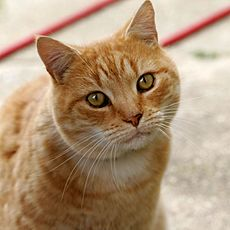

In [0]:
# 猫の画像を表示
from IPython.display import Image,display_jpeg
display_jpeg(Image("./cats/000001.jpg"))

In [0]:
from PIL import Image
import os, glob
import numpy as np
classes = ["dogs", "cats"]
num_classes = len(classes)
image_size = 64
num_testdata = 25

X_train = []
X_test  = []
Y_train = []
Y_test  = []

for index, classlabel in enumerate(classes):
    photos_dir = "./" + classlabel
    files = glob.glob(photos_dir + "/*.jpg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        if i < num_testdata:
            X_test.append(data)
            Y_test.append(index)
        else:
            for angle in range(-20, 20, 5):

                img_r = image.rotate(angle)
                data = np.asarray(img_r)
                X_train.append(data)
                Y_train.append(index)

                img_trans = img_r.transpose(Image.FLIP_LEFT_RIGHT)
                data = np.asarray(img_trans)
                X_train.append(data)
                Y_train.append(index)

X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(Y_train)
y_test  = np.array(Y_test)

xy = (X_train, X_test, y_train, y_test)
np.save("./dog_cat.npy", xy)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
import keras
import numpy as np

classes = ["dog", "cat"]
num_classes = len(classes)
image_size = 64

"""
データを読み込む関数
"""
def load_data():
    X_train, X_test, y_train, y_test = np.load("./dog_cat.npy", allow_pickle=True)
    # データを正規化
    X_train = X_train.astype("float") / 255
    X_test  = X_test.astype("float") / 255
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test  = np_utils.to_categorical(y_test, num_classes)

    return X_train, y_train, X_test, y_test

"""
モデルを学習する関数
"""
def train(X, y, X_test, y_test):
    model = Sequential()
    model.add(Conv2D(32,(3,3), padding='same',input_shape=X.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.45))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    opt = keras.optimizers.rmsprop(lr=0.00005, decay=1e-6)
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    model.fit(X, y, batch_size=28, epochs=40)
    model.save('./cnn.h5')

    return model

"""
メイン関数
データの読み込みとモデルの学習を行います。
"""
def main():
    # データの読み込み
    X_train, y_train, X_test, y_test = load_data()

    # モデルの学習
    model = train(X_train, y_train, X_test, y_test)

main()

Epoch 1/40


E0701 08:33:50.082166 140479738648320 downloader.py:138] Response status code 404, file https://amd.c.yimg.jp/im_siggoCxJ5lntx7qoFm11ifjq4A---x267-y400-q90-exp3h-pril/amd/20190418-00007508-inumag-000-1-view.jpg


13008/13008 [==============================] - 11s 880us/step - loss: 0.6498 - acc: 0.6205
Epoch 2/40
13008/13008 [==============================] - 8s 587us/step - loss: 0.5872 - acc: 0.6800
Epoch 3/40
 9408/13008 [====================>.........] - ETA: 2s - loss: 0.5441 - acc: 0.7121

E0701 08:34:11.628803 140479738648320 downloader.py:131] Exception caught when downloading file https://www.ana.co.jp/japan-travel-planner/area/tohoku/akita/0000003/main.jpg, error: HTTPSConnectionPool(host='www.ana.co.jp', port=443): Read timed out. (read timeout=5), remaining retry times: 2


13008/13008 [==============================] - 8s 580us/step - loss: 0.5382 - acc: 0.7176
Epoch 4/40
 5040/13008 [==========>...................] - ETA: 4s - loss: 0.5024 - acc: 0.7552

E0701 08:34:16.699802 140479738648320 downloader.py:131] Exception caught when downloading file https://www.ana.co.jp/japan-travel-planner/area/tohoku/akita/0000003/main.jpg, error: HTTPSConnectionPool(host='www.ana.co.jp', port=443): Read timed out. (read timeout=5), remaining retry times: 1


13008/13008 [==============================] - 8s 582us/step - loss: 0.4946 - acc: 0.7579
Epoch 5/40
  784/13008 [>.............................] - ETA: 7s - loss: 0.4506 - acc: 0.7946

E0701 08:34:21.759645 140479738648320 downloader.py:131] Exception caught when downloading file https://www.ana.co.jp/japan-travel-planner/area/tohoku/akita/0000003/main.jpg, error: HTTPSConnectionPool(host='www.ana.co.jp', port=443): Read timed out. (read timeout=5), remaining retry times: 0


13008/13008 [==============================] - 8s 588us/step - loss: 0.4550 - acc: 0.7856
Epoch 6/40
13008/13008 [==============================] - 8s 586us/step - loss: 0.4255 - acc: 0.8067
Epoch 7/40
13008/13008 [==============================] - 8s 587us/step - loss: 0.3951 - acc: 0.8266
Epoch 8/40
13008/13008 [==============================] - 8s 584us/step - loss: 0.3627 - acc: 0.8408
Epoch 9/40
13008/13008 [==============================] - 8s 581us/step - loss: 0.3296 - acc: 0.8585
Epoch 10/40
 3892/13008 [=======>......................] - ETA: 5s - loss: 0.3055 - acc: 0.8723

E0701 08:35:01.665207 140479738648320 downloader.py:138] Response status code 404, file https://amd.c.yimg.jp/im_siggMgWPsTUzzYbW2p_wfjpX5A---x300-y400-q90-exp3h-pril/amd/20190526-00008352-inumag-002-1-view.jpg


13008/13008 [==============================] - 8s 584us/step - loss: 0.2973 - acc: 0.8759
Epoch 11/40
13008/13008 [==============================] - 8s 589us/step - loss: 0.2706 - acc: 0.8891
Epoch 12/40
13008/13008 [==============================] - 8s 597us/step - loss: 0.2360 - acc: 0.9054
Epoch 13/40
13008/13008 [==============================] - 8s 589us/step - loss: 0.2143 - acc: 0.9155
Epoch 14/40
13008/13008 [==============================] - 8s 581us/step - loss: 0.1887 - acc: 0.9294
Epoch 15/40
13008/13008 [==============================] - 8s 589us/step - loss: 0.1644 - acc: 0.9397
Epoch 16/40
13008/13008 [==============================] - 8s 585us/step - loss: 0.1414 - acc: 0.9493
Epoch 17/40
13008/13008 [==============================] - 8s 582us/step - loss: 0.1240 - acc: 0.9546
Epoch 18/40
13008/13008 [==============================] - 8s 581us/step - loss: 0.1054 - acc: 0.9631
Epoch 19/40
13008/13008 [==============================] - 8s 584us/step - loss: 0.0892 - acc:

In [0]:
from google.colab import files
uploaded = files.upload()

E0701 08:32:51.089099 140479738648320 downloader.py:138] Response status code 403, file https://www.hojo.or.jp/image.php?src=/content/images/photo2019/190309g1.jpg&w=500&h=375&aoe=1&hash=8884cacbe7260a263cccf8833d8c863e


Saving dog.0.jpg to dog.0.jpg
Saving dog.1.jpg to dog.1.jpg
Saving dog.2.jpg to dog.2.jpg
Saving dog.3.jpg to dog.3.jpg
Saving dog.4.jpg to dog.4.jpg
Saving dog.5.jpg to dog.5.jpg
Saving dog.6.jpg to dog.6.jpg
Saving dog.7.jpg to dog.7.jpg
Saving dog.8.jpg to dog.8.jpg
Saving dog.9.jpg to dog.9.jpg
Saving dog.10.jpg to dog.10.jpg
Saving dog.11.jpg to dog.11.jpg
Saving dog.12.jpg to dog.12.jpg
Saving dog.13.jpg to dog.13.jpg
Saving dog.14.jpg to dog.14.jpg
Saving dog.15.jpg to dog.15.jpg
Saving dog.16.jpg to dog.16.jpg
Saving dog.17.jpg to dog.17.jpg
Saving dog.18.jpg to dog.18.jpg
Saving dog.19.jpg to dog.19.jpg


In [0]:
import keras
import sys, os
import scipy
import scipy.misc
import numpy as np
from keras.models import load_model

import cv2

imsize = (64, 64)

"""
dog1.pngというファイル名の画像をGoogle Colab上にアップロードする方法は2通りあります。
1つが、下記のコードを実行し画像をアップロードする方法
from google.colab import files
uploaded = files.upload()
2つが、Colab左メニューの>アイコンを押して、目次、コード スニペット、ファイル
の3つ表示されるますが、右のファイルタブから画像をアップロードする方法です。
このファイルタブをクリックするとアップロードと更新の2つがありますが、
アップロードを押すと画像をアップロードすることが可能です。
"""

testpic     = "./cat.1.jpg"
keras_param = "./cnn.h5"

def load_image(path):
    img = Image.open(path)
    img = img.convert('RGB')
    img = img.resize(imsize)
    img = np.asarray(img)
    img = img / 255.0
    return img

def get_file(dir_path):
    filenames = os.listdir(dir_path)
    return filenames

if __name__ == "__main__":

    model = load_model(keras_param)
    for i in range(20):
      img = load_image("cat.%d.jpg"% i)
      print("cat.%d.jpg"%i)
    #img = load_image(testpic)
      prd = model.predict(np.array([img]))
      print(prd) # 精度の表示
      prelabel = np.argmax(prd, axis=1)
      if prelabel == 0:
          print(">>> 犬")
      elif prelabel == 1:
          print(">>> 猫")
    print("_______")
    for i in range(20):
      img = load_image("dog.%d.jpg"% i)
      print("cat.%d.jpg"%i)
    #img = load_image(testpic)
      prd = model.predict(np.array([img]))
      print(prd) # 精度の表示
      prelabel = np.argmax(prd, axis=1)
      if prelabel == 0:
          print(">>> 犬")
      elif prelabel == 1:
          print(">>> 猫")

cat.0.jpg
[[2.0793744e-15 1.0000000e+00]]
>>> 猫
cat.1.jpg
[[0.01335051 0.98664945]]
>>> 猫
cat.2.jpg
[[9.853215e-05 9.999014e-01]]
>>> 猫
cat.3.jpg
[[0.19843167 0.8015683 ]]
>>> 猫
cat.4.jpg
[[0.21663466 0.7833653 ]]
>>> 猫
cat.5.jpg
[[5.3479998e-06 9.9999464e-01]]
>>> 猫
cat.6.jpg
[[0.95833135 0.04166861]]
>>> 犬
cat.7.jpg
[[0.0369317 0.9630683]]
>>> 猫
cat.8.jpg
[[0.00168198 0.9983181 ]]
>>> 猫
cat.9.jpg
[[2.3027634e-12 1.0000000e+00]]
>>> 猫
cat.10.jpg
[[4.3056116e-05 9.9995697e-01]]
>>> 猫
cat.11.jpg
[[0.01925624 0.9807437 ]]
>>> 猫
cat.12.jpg
[[0.20751427 0.7924857 ]]
>>> 猫
cat.13.jpg
[[0.5275501 0.4724499]]
>>> 犬
cat.14.jpg
[[4.236929e-10 1.000000e+00]]
>>> 猫
cat.15.jpg
[[1.1628371e-05 9.9998832e-01]]
>>> 猫
cat.16.jpg
[[0.99634165 0.00365833]]
>>> 犬
cat.17.jpg
[[3.8901569e-05 9.9996114e-01]]
>>> 猫
cat.18.jpg
[[1.7201145e-11 1.0000000e+00]]
>>> 猫
cat.19.jpg
[[0.06497312 0.93502694]]
>>> 猫
_______
cat.0.jpg
[[4.3943891e-04 9.9956053e-01]]
>>> 猫
cat.1.jpg
[[9.9999547e-01 4.5886168e-06]]
>>> 犬


In [0]:
#改定後

In [0]:
from PIL import Image
import os, glob
import numpy as np
classes = ["dogs", "cats"]
num_classes = len(classes)
image_size = 64
num_testdata = 25

X_train = []
X_test  = []
Y_train = []
Y_test  = []

for index, classlabel in enumerate(classes):
    photos_dir = "./" + classlabel
    files = glob.glob(photos_dir + "/*.jpg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        if i < num_testdata:
            X_test.append(data)
            Y_test.append(index)
        else:
            for angle in range(-20, 20, 5):

                img_r = image.rotate(angle)
                data = np.asarray(img_r)
                X_train.append(data)
                Y_train.append(index)

                img_trans = img_r.transpose(Image.FLIP_LEFT_RIGHT)
                data = np.asarray(img_trans)
                X_train.append(data)
                Y_train.append(index)

X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(Y_train)
y_test  = np.array(Y_test)

xy = (X_train, X_test, y_train, y_test)
np.save("./dog_cat.npy", xy)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
import keras
import numpy as np

classes = ["dog", "cat"]
num_classes = len(classes)
image_size = 64

"""
データを読み込む関数
"""
def load_data():
    X_train, X_test, y_train, y_test = np.load("./dog_cat.npy", allow_pickle=True)
    # データを正規化
    X_train = X_train.astype("float") / 255
    X_test  = X_test.astype("float") / 255
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test  = np_utils.to_categorical(y_test, num_classes)

    return X_train, y_train, X_test, y_test

"""
モデルを学習する関数
"""
def train(X, y, X_test, y_test):
    model = Sequential()
    model.add(Conv2D(32,(3,3), padding='same',input_shape=X.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.45))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    opt = keras.optimizers.rmsprop(lr=0.00005, decay=1e-6)
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    model.fit(X, y, batch_size=28, epochs=40)
    model.save('./cnn.h5')

    return model

"""
メイン関数
データの読み込みとモデルの学習を行います。
"""
def main():
    # データの読み込み
    X_train, y_train, X_test, y_test = load_data()

    # モデルの学習
    model = train(X_train, y_train, X_test, y_test)

main()

Epoch 1/40
16976/16976 [==============================] - 14s 797us/step - loss: 0.6457 - acc: 0.6176
Epoch 2/40
16976/16976 [==============================] - 10s 573us/step - loss: 0.5907 - acc: 0.6728
Epoch 3/40
16976/16976 [==============================] - 10s 574us/step - loss: 0.5468 - acc: 0.7100
Epoch 4/40
16976/16976 [==============================] - 10s 575us/step - loss: 0.5008 - acc: 0.7558
Epoch 5/40
16976/16976 [==============================] - 10s 571us/step - loss: 0.4522 - acc: 0.7836
Epoch 6/40
16976/16976 [==============================] - 10s 573us/step - loss: 0.4147 - acc: 0.8078
Epoch 7/40
16976/16976 [==============================] - 10s 574us/step - loss: 0.3840 - acc: 0.8238
Epoch 8/40
16976/16976 [==============================] - 10s 579us/step - loss: 0.3530 - acc: 0.8434
Epoch 9/40
16976/16976 [==============================] - 10s 577us/step - loss: 0.3280 - acc: 0.8546
Epoch 10/40
16976/16976 [==============================] - 10s 573us/step - loss: 

In [0]:
import keras
import sys, os
import numpy as np
from keras.models import load_model

imsize = (64, 64)

"""
dog1.pngというファイル名の画像をGoogle Colab上にアップロードする方法は2通りあります。
1つが、下記のコードを実行し画像をアップロードする方法
from google.colab import files
uploaded = files.upload()
2つが、Colab左メニューの>アイコンを押して、目次、コード スニペット、ファイル
の3つ表示されるますが、右のファイルタブから画像をアップロードする方法です。
このファイルタブをクリックするとアップロードと更新の2つがありますが、
アップロードを押すと画像をアップロードすることが可能です。
"""

testpic     = "dog.2.jpg"
keras_param = "./cnn.h5"

def load_image(path):
    img = Image.open(path)
    img = img.convert('RGB')
    img = img.resize(imsize)
    img = np.asarray(img)
    img = img / 255.0
    return img

def get_file(dir_path):
    filenames = os.listdir(dir_path)
    return filenames

if __name__ == "__main__":

    model = load_model(keras_param)
    img = load_image(testpic)
    prd = model.predict(np.array([img]))
    print(prd) # 精度の表示
    prelabel = np.argmax(prd, axis=1)
    if prelabel == 0:
        print(">>> 犬")
    elif prelabel == 1:
        print(">>> 猫")

[[9.9999940e-01 6.0332667e-07]]
>>> 犬


In [0]:
!pip install icrawler

In [0]:
from icrawler.builtin import GoogleImageCrawler

# 猫の画像を100枚取得
crawler = GoogleImageCrawler(storage={"root_dir": "cats"})
crawler.crawl(keyword="猫", max_num=300)

I0704 07:55:05.072188 140517986678656 crawler.py:170] start crawling...
I0704 07:55:05.073491 140517986678656 crawler.py:177] starting 1 feeder threads...
I0704 07:55:05.075169 140515423618816 feeder.py:44] thread feeder-001 exit
I0704 07:55:05.075435 140517986678656 crawler.py:181] starting 1 parser threads...
I0704 07:55:05.087955 140517986678656 crawler.py:185] starting 1 downloader threads...
I0704 07:55:05.509834 140515423618816 parser.py:103] parsing result page https://www.google.com/search?q=%E7%8C%AB&ijn=0&start=0&tbs=&tbm=isch
I0704 07:55:05.562796 140515415226112 downloader.py:121] skip downloading file 000001.jpg
I0704 07:55:05.564871 140515415226112 downloader.py:121] skip downloading file 000002.jpg
I0704 07:55:05.568298 140515415226112 downloader.py:121] skip downloading file 000003.jpg
I0704 07:55:05.569579 140515415226112 downloader.py:121] skip downloading file 000004.jpg
I0704 07:55:05.571304 140515415226112 downloader.py:121] skip downloading file 000005.jpg
I0704 0

In [0]:
# 犬の画像を100枚取得
crawler = GoogleImageCrawler(storage={"root_dir": "dogs"})
crawler.crawl(keyword="犬", max_num=300)

I0704 07:57:14.274708 140517986678656 crawler.py:170] start crawling...
I0704 07:57:14.277705 140517986678656 crawler.py:177] starting 1 feeder threads...
I0704 07:57:14.280016 140515415226112 feeder.py:44] thread feeder-001 exit
I0704 07:57:14.281970 140517986678656 crawler.py:181] starting 1 parser threads...
I0704 07:57:14.283897 140517986678656 crawler.py:185] starting 1 downloader threads...
I0704 07:57:14.533306 140515415226112 parser.py:103] parsing result page https://www.google.com/search?q=%E7%8A%AC&ijn=0&start=0&tbs=&tbm=isch
I0704 07:57:14.587554 140515423618816 downloader.py:121] skip downloading file 000001.jpg
I0704 07:57:14.589747 140515423618816 downloader.py:121] skip downloading file 000002.jpg
I0704 07:57:14.592923 140515423618816 downloader.py:121] skip downloading file 000003.jpg
I0704 07:57:14.594909 140515423618816 downloader.py:121] skip downloading file 000004.jpg
I0704 07:57:14.596119 140515423618816 downloader.py:121] skip downloading file 000005.jpg
I0704 0

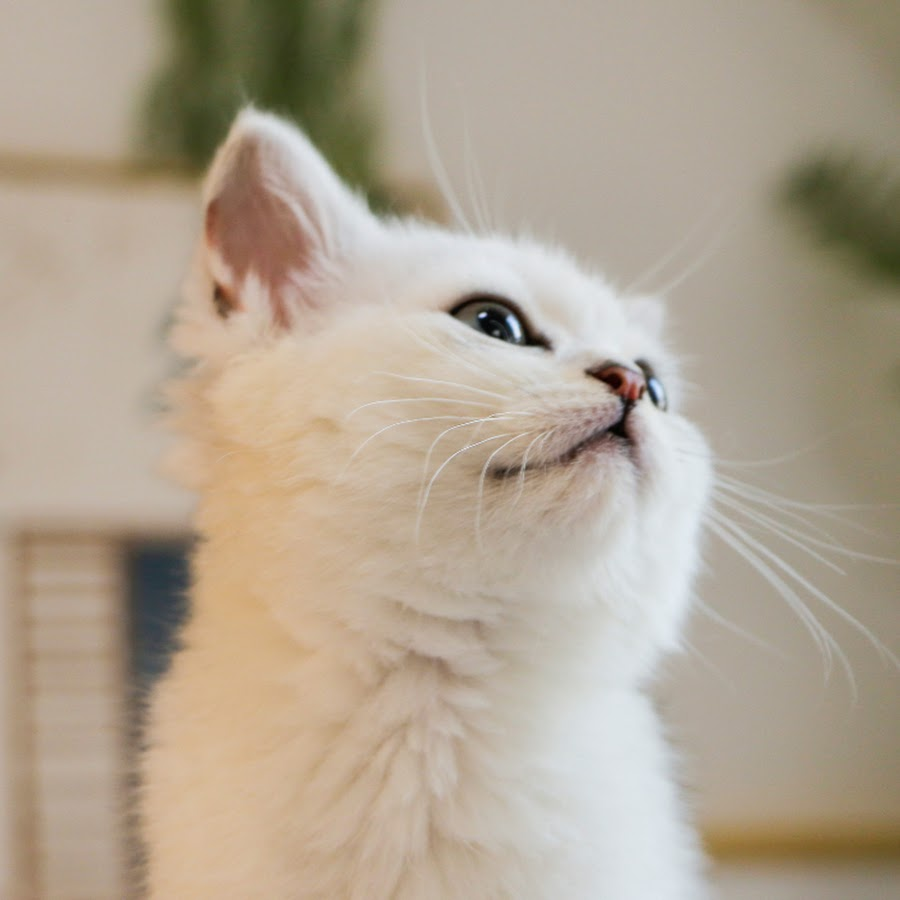

In [0]:
# 猫の画像を表示
from IPython.display import Image,display_jpeg
display_jpeg(Image("./cats/000001.jpg"))

In [0]:
from PIL import Image
import os, glob
import numpy as np
classes = ["dogs", "cats"]
num_classes = len(classes)
image_size = 64
num_testdata = 25

X_train = []
X_test  = []
Y_train = []
Y_test  = []

for index, classlabel in enumerate(classes):
    photos_dir = "./" + classlabel
    files = glob.glob(photos_dir + "/*.jpg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        if i < num_testdata:
            X_test.append(data)
            Y_test.append(index)
        else:
            for angle in range(-20, 20, 5):

                img_r = image.rotate(angle)
                data = np.asarray(img_r)
                X_train.append(data)
                Y_train.append(index)

                img_trans = img_r.transpose(Image.FLIP_LEFT_RIGHT)
                data = np.asarray(img_trans)
                X_train.append(data)
                Y_train.append(index)

X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(Y_train)
y_test  = np.array(Y_test)

xy = (X_train, X_test, y_train, y_test)
np.save("./dog_cat.npy", xy)

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
import keras
import numpy as np

classes = ["dog", "cat"]
num_classes = len(classes)
image_size = 64

"""
データを読み込む関数
"""
def load_data():
    X_train, X_test, y_train, y_test = np.load("./dog_cat.npy", allow_pickle=True)
    # データを正規化
    X_train = X_train.astype("float") / 255
    X_test  = X_test.astype("float") / 255
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test  = np_utils.to_categorical(y_test, num_classes)

    return X_train, y_train, X_test, y_test

"""
モデルを学習する関数
"""
def train(X, y, X_test, y_test):
    model = Sequential()
    model.add(Conv2D(32,(3,3), padding='same',input_shape=X.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.45))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    opt = keras.optimizers.rmsprop(lr=0.00005, decay=1e-6)
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    model.fit(X, y, batch_size=28, epochs=40)
    model.save('./cnn.h5')

    return model

"""
メイン関数
データの読み込みとモデルの学習を行います。
"""
def main():
    # データの読み込み
    X_train, y_train, X_test, y_test = load_data()

    # モデルの学習
    model = train(X_train, y_train, X_test, y_test)

main()

Epoch 1/40
6512/6512 [==============================] - 8s 1ms/step - loss: 0.6594 - acc: 0.5903
Epoch 2/40
6512/6512 [==============================] - 7s 1ms/step - loss: 0.5870 - acc: 0.6726
Epoch 3/40
6512/6512 [==============================] - 7s 1ms/step - loss: 0.5381 - acc: 0.7102
Epoch 4/40
6512/6512 [==============================] - 7s 1ms/step - loss: 0.4995 - acc: 0.7469
Epoch 5/40
6512/6512 [==============================] - 7s 1ms/step - loss: 0.4655 - acc: 0.7756
Epoch 6/40
6512/6512 [==============================] - 7s 1ms/step - loss: 0.4295 - acc: 0.7958
Epoch 7/40
6512/6512 [==============================] - 7s 1ms/step - loss: 0.3937 - acc: 0.8160
Epoch 8/40
6512/6512 [==============================] - 8s 1ms/step - loss: 0.3571 - acc: 0.8414
Epoch 9/40
6512/6512 [==============================] - 8s 1ms/step - loss: 0.3333 - acc: 0.8520
Epoch 10/40
6512/6512 [==============================] - 7s 1ms/step - loss: 0.3010 - acc: 0.8712
Epoch 11/40
6512/6512 [======

In [0]:
from google.colab import files
uploaded = files.upload()

Saving dog.5.jpg to dog.5.jpg
Saving dog.6.jpg to dog.6.jpg
Saving dog.7.jpg to dog.7.jpg
Saving dog.8.jpg to dog.8.jpg
Saving dog.9.jpg to dog.9.jpg
Saving dog.10.jpg to dog.10.jpg
Saving dog.11.jpg to dog.11.jpg
Saving dog.12.jpg to dog.12.jpg
Saving dog.13.jpg to dog.13.jpg
Saving dog.14.jpg to dog.14.jpg
Saving dog.15.jpg to dog.15.jpg
Saving dog.16.jpg to dog.16.jpg
Saving dog.17.jpg to dog.17.jpg
Saving dog.18.jpg to dog.18.jpg
Saving dog.19.jpg to dog.19.jpg
Saving dog.0.jpg to dog.0.jpg
Saving dog.1.jpg to dog.1.jpg
Saving dog.2.jpg to dog.2 (1).jpg
Saving dog.3.jpg to dog.3.jpg
Saving dog.4.jpg to dog.4 (1).jpg


In [0]:
import keras
import sys, os
import numpy as np
from keras.models import load_model

imsize = (64, 64)

"""
dog1.pngというファイル名の画像をGoogle Colab上にアップロードする方法は2通りあります。
1つが、下記のコードを実行し画像をアップロードする方法
from google.colab import files
uploaded = files.upload()
2つが、Colab左メニューの>アイコンを押して、目次、コード スニペット、ファイル
の3つ表示されるますが、右のファイルタブから画像をアップロードする方法です。
このファイルタブをクリックするとアップロードと更新の2つがありますが、
アップロードを押すと画像をアップロードすることが可能です。
"""

testpic     = "./dog.23.jpg"
keras_param = "./cnn.h5"

def load_image(path):
    img = Image.open(path)
    img = img.convert('RGB')
    img = img.resize(imsize)
    img = np.asarray(img)
    img = img / 255.0
    return img

def get_file(dir_path):
    filenames = os.listdir(dir_path)
    return filenames

if __name__ == "__main__":

    model = load_model(keras_param)
    for i in range(20):
      img = load_image("./dog.%d.jpg"%i)
      prd = model.predict(np.array([img]))
      print(prd) # 精度の表示
      prelabel = np.argmax(prd, axis=1)
      if prelabel == 0:
          print(">>> 犬")
      elif prelabel == 1:
          print(">>> 猫")

[[9.9972457e-01 2.7542165e-04]]
>>> 犬
[[1.0000000e+00 1.8679584e-10]]
>>> 犬
[[0.7806137  0.21938628]]
>>> 犬
[[9.722942e-04 9.990277e-01]]
>>> 猫
[[9.9999917e-01 8.1564394e-07]]
>>> 犬
[[1.0000000e+00 6.0655145e-16]]
>>> 犬
[[9.999937e-01 6.369310e-06]]
>>> 犬
[[0.11642986 0.88357013]]
>>> 猫
[[0.99686676 0.00313319]]
>>> 犬
[[9.9998176e-01 1.8268107e-05]]
>>> 犬
[[8.377190e-05 9.999162e-01]]
>>> 猫
[[1.000000e+00 1.465212e-15]]
>>> 犬
[[6.6567063e-10 1.0000000e+00]]
>>> 猫
[[6.131387e-07 9.999994e-01]]
>>> 猫
[[9.9974698e-01 2.5304875e-04]]
>>> 犬
[[1.6750158e-09 1.0000000e+00]]
>>> 猫
[[1.0000000e+00 1.5810632e-11]]
>>> 犬
[[0.52698225 0.47301778]]
>>> 犬
[[0.9104011  0.08959888]]
>>> 犬
[[1.7372817e-05 9.9998260e-01]]
>>> 猫


In [1]:
!pip install icrawler

In [2]:
from icrawler.builtin import GoogleImageCrawler

# 猫の画像を100枚取得
crawler = GoogleImageCrawler(storage={"root_dir": "cats"})
crawler.crawl(keyword="猫", max_num=100)

2019-07-07 05:52:21,393 - INFO - icrawler.crawler - start crawling...
2019-07-07 05:52:21,394 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-07-07 05:52:21,401 - INFO - feeder - thread feeder-001 exit
2019-07-07 05:52:21,401 - INFO - icrawler.crawler - starting 1 parser threads...
2019-07-07 05:52:21,407 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-07-07 05:52:21,807 - INFO - parser - parsing result page https://www.google.com/search?q=%E7%8C%AB&ijn=0&start=0&tbs=&tbm=isch
2019-07-07 05:52:25,381 - INFO - downloader - image #1	https://img0.pclady.com.cn/pclady/pet/choice/cat/1701/6.jpg
2019-07-07 05:52:25,446 - INFO - downloader - image #2	https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Cat03.jpg/230px-Cat03.jpg
2019-07-07 05:52:25,802 - INFO - downloader - image #3	https://pic4.zhimg.com/80/v2-2e21b2dcaf9233c5697c46524b2f4aae_qhd.jpg
2019-07-07 05:52:25,830 - INFO - downloader - image #4	https://yt3.ggpht.com/a/AGF-l7_wql0rgr1h1lH6RTewb49d

In [3]:
# 犬の画像を100枚取得
crawler = GoogleImageCrawler(storage={"root_dir": "dogs"})
crawler.crawl(keyword="犬", max_num=100)

2019-07-07 05:54:07,564 - INFO - icrawler.crawler - start crawling...
2019-07-07 05:54:07,564 - INFO - icrawler.crawler - starting 1 feeder threads...
2019-07-07 05:54:07,566 - INFO - feeder - thread feeder-001 exit
2019-07-07 05:54:07,566 - INFO - icrawler.crawler - starting 1 parser threads...
2019-07-07 05:54:07,569 - INFO - icrawler.crawler - starting 1 downloader threads...
2019-07-07 05:54:07,855 - INFO - parser - parsing result page https://www.google.com/search?q=%E7%8A%AC&ijn=0&start=0&tbs=&tbm=isch
2019-07-07 05:54:08,328 - INFO - downloader - image #1	https://www.min-inuzukan.com/images/dog_img_shiba.jpg?18102302
2019-07-07 05:54:09,963 - INFO - downloader - image #2	https://grapee.jp/wp-content/uploads/33342_main1.jpg
2019-07-07 05:54:10,302 - INFO - downloader - image #3	https://dol.ismcdn.jp/mwimgs/7/1/670m/img_71c53c1d81500a1cf73a4f543e72413f27838.jpg
2019-07-07 05:54:12,140 - INFO - downloader - image #4	https://www.1242.com/lf/asset/uploads/2018/01/dog-3045116_1280a.jp

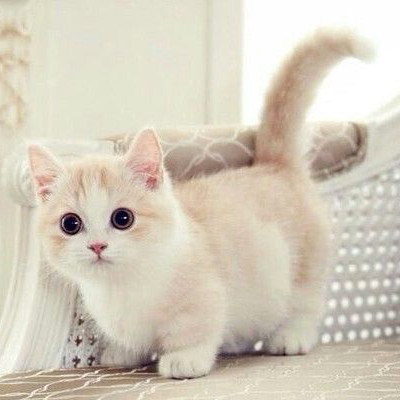

In [4]:
# 猫の画像を表示
from IPython.display import Image,display_jpeg
display_jpeg(Image("./cats/000001.jpg"))

In [0]:
from PIL import Image
import os, glob
import numpy as np
classes = ["dogs", "cats"]
num_classes = len(classes)
image_size = 64
num_testdata = 25

X_train = []
X_test  = []
Y_train = []
Y_test  = []

for index, classlabel in enumerate(classes):
    photos_dir = "./" + classlabel
    files = glob.glob(photos_dir + "/*.jpg")
    for i, file in enumerate(files):
        image = Image.open(file)
        image = image.convert("RGB")
        image = image.resize((image_size, image_size))
        data = np.asarray(image)
        if i < num_testdata:
            X_test.append(data)
            Y_test.append(index)
        else:
            for angle in range(-20, 20, 5):

                img_r = image.rotate(angle)
                data = np.asarray(img_r)
                X_train.append(data)
                Y_train.append(index)

                img_trans = img_r.transpose(Image.FLIP_LEFT_RIGHT)
                data = np.asarray(img_trans)
                X_train.append(data)
                Y_train.append(index)

X_train = np.array(X_train)
X_test  = np.array(X_test)
y_train = np.array(Y_train)
y_test  = np.array(Y_test)

xy = (X_train, X_test, y_train, y_test)
np.save("./dog_cat.npy", xy)

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.utils import np_utils
import keras
import numpy as np

classes = ["dog", "cat"]
num_classes = len(classes)
image_size = 64

"""
データを読み込む関数
"""
def load_data():
    X_train, X_test, y_train, y_test = np.load("./dog_cat.npy", allow_pickle=True)
    # データを正規化
    X_train = X_train.astype("float") / 255
    X_test  = X_test.astype("float") / 255
    y_train = np_utils.to_categorical(y_train, num_classes)
    y_test  = np_utils.to_categorical(y_test, num_classes)

    return X_train, y_train, X_test, y_test

"""
モデルを学習する関数
"""
def train(X, y, X_test, y_test):
    model = Sequential()
    model.add(Conv2D(32,(3,3), padding='same',input_shape=X.shape[1:]))
    model.add(Activation('relu'))
    model.add(Conv2D(32,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.1))

    model.add(Conv2D(64,(3,3), padding='same'))
    model.add(Activation('relu'))
    model.add(Conv2D(64,(3,3)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.45))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    opt = keras.optimizers.rmsprop(lr=0.00005, decay=1e-6)
    model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
    model.fit(X, y, batch_size=28, epochs=40)
    model.save('./cnn.h5')

    return model

"""
メイン関数
データの読み込みとモデルの学習を行います。
"""
def main():
    # データの読み込み
    X_train, y_train, X_test, y_test = load_data()

    # モデルの学習
    model = train(X_train, y_train, X_test, y_test)

main()

Using TensorFlow backend.
W0707 05:55:28.299331 139822540982144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0707 05:55:28.332360 139822540982144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0707 05:55:28.339227 139822540982144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0707 05:55:28.376935 139822540982144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0707 05:55:28.379717 1398225

Epoch 1/40
1120/1120 [==============================] - 7s 7ms/step - loss: 0.7019 - acc: 0.5732
Epoch 2/40
1120/1120 [==============================] - 1s 556us/step - loss: 0.6424 - acc: 0.6018
Epoch 3/40
1120/1120 [==============================] - 1s 558us/step - loss: 0.5888 - acc: 0.6786
Epoch 4/40
1120/1120 [==============================] - 1s 556us/step - loss: 0.5506 - acc: 0.7116
Epoch 5/40
1120/1120 [==============================] - 1s 554us/step - loss: 0.5085 - acc: 0.7321
Epoch 6/40
1120/1120 [==============================] - 1s 549us/step - loss: 0.4766 - acc: 0.7545
Epoch 7/40
1120/1120 [==============================] - 1s 548us/step - loss: 0.4431 - acc: 0.7786
Epoch 8/40
1120/1120 [==============================] - 1s 554us/step - loss: 0.4226 - acc: 0.8161
Epoch 9/40
1120/1120 [==============================] - 1s 550us/step - loss: 0.4063 - acc: 0.8054
Epoch 10/40
1120/1120 [==============================] - 1s 550us/step - loss: 0.3777 - acc: 0.8393
Epoch 11/40

In [10]:
from google.colab import files
uploaded = files.upload()

Saving cat.2.jpg to cat.2.jpg
Saving cat.3.jpg to cat.3.jpg
Saving cat.4.jpg to cat.4.jpg


In [15]:
import keras
import sys, os
import numpy as np
from keras.models import load_model

imsize = (64, 64)

"""
dog1.pngというファイル名の画像をGoogle Colab上にアップロードする方法は2通りあります。
1つが、下記のコードを実行し画像をアップロードする方法
from google.colab import files
uploaded = files.upload()
2つが、Colab左メニューの>アイコンを押して、目次、コード スニペット、ファイル
の3つ表示されるますが、右のファイルタブから画像をアップロードする方法です。
このファイルタブをクリックするとアップロードと更新の2つがありますが、
アップロードを押すと画像をアップロードすることが可能です。
"""

testpic     = "./cat.2.jpg"
keras_param = "./cnn.h5"

def load_image(path):
    img = Image.open(path)
    img = img.convert('RGB')
    img = img.resize(imsize)
    img = np.asarray(img)
    img = img / 255.0
    return img

def get_file(dir_path):
    filenames = os.listdir(dir_path)
    return filenames

if __name__ == "__main__":

    model = load_model(keras_param)
    img = load_image(testpic)
    prd = model.predict(np.array([img]))
    print(prd) # 精度の表示
    prelabel = np.argmax(prd, axis=1)
    if prelabel == 0:
        print(">>> 犬")
    elif prelabel == 1:
        print(">>> 猫")

[[0.07995268 0.92004734]]
>>> 猫
